# Question 1:
## Dataset Overview:
The dataset contains 2169 questions with their labels, matching the given ten categories in the question. The dataset is a CSV file with 2 columns: text and label.
Each label:
- num of questions:  2169
- label 0: 227 items
- label 1: 222 items
- label 2: 221 items
- label 3: 220 items
- label 4: 217 items
- label 5: 215 items
- label 6: 213 items
- label 7: 212 items
- label 8: 211 items
- label 9: 211 items

## Potentential Approaches:

Natural Language Processing (NLP) is a field of artificial intelligence (AI) that focuses on the interaction between computers and humans through natural language. NLP is a broad area that includes several subfields, each focusing on different aspects of language processing.
NLP has two subfields:
- Natural Language Understanding (NLU)
- Natural Language Generation (NLG):

Our focus is on NLG which produces text from structured data like Chatbots that we have in this challenge.

## Machine Learning Approaches:

There are several Machine Learning approaches that we can use for this task:
- Logistic Regression:
To predict a categorical outcome.
- - Pros: Simple, interpretable, and efficient. It works well with 10 or less classes.
- - Cons: Assumes linear decision boundary. Can scale well with large datasets, but performance may degrade when there are many highly correlated features.

- Support Vector Machines:
Learns a decision boundary as a line or a hyperplane is chosen to maximize the margin to the nearest sample in each of the two classes.
- - Pros: Works well with high-dimensional data. Excellent for linear and non-linear problems. (For Binary Classification)
- - Cons: Computationally expensive for large datasets.

- Naive Bayes: It tries to understand the pattern of each class separately and then use that knowledge to make predictions.
- - Pros: Fast, works well with text data, Very effective for binary classification.
- - Cons: May struggle with imbalanced data (10+ labels), Assumes feature independence, which is unrealistic.

- Random Forest: An ensemble method that combines multiple decision trees to improve accuracy.
- - Pros: Handles non-linear data well and high-dimensional data, robust to outliers.
- - Cons: Can be slow for large datasets, sensitive to noise and outliers.

- k-Nearest Neighbors (KNN): Classifies data based on the majority class of the closest k neighbors.
- - Pros: Simple, easy to understand and works well on binary classification tasks.
- - Cons: Less efficient for more than 2 labels classification. Computationally expensive, Struggles with high-dimensional data like TF-IDF.

- Decision Trees: A non-linear model that split data based on feature values to make decisions.
- - Pros: Works well with binary classification and works good with few label classification (less than 10), Interpretable, easy to implement.
- - Cons: Overfits with many labels (10+ labels).

## Why I chose Logistic Regression:

By knowing the dataset size which is small (2169 questions), number of labels (10 labels), and text-based nature, Logistic Regression with TF-IDF is the most efficient, interpretable, and effective option.

# Question 2(Implemention):
## Importing the libraries
I used: 
- matplotlib.pyplot for plotting the graphs and numpy for the calculations.
- pandas for reading the csv file.
- seaborn for the heatmap.
- sklearn.feature_extraction.text for the tfidf vectorizer.
- sklearn.linear_model for the logistic regression.
- sklearn.metrics for the classification metrics.
- sklearn.model_selection for splitting the data into training and testing sets and evaluating the model.

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix)
from sklearn.model_selection import train_test_split

# Question 3:
## Loading the dataset:
Reading the dataset from the csv file.
Dropping the missing values (null) and splitting the dataset into train and test.
The test set is 20% of the dataset.

In [17]:
# Load the dataset
file_path = "ds_task_dataset.csv"
df = pd.read_csv(file_path)

# Display dataset info
display("Dataset Overview:")
display(df.head())

# Check for missing values
display("Missing Values:")
display(df.isnull().sum())

# Drop missing values if any
df.dropna(inplace=True)

# Splitting data into training and testing sets
X = df["text"]  # Input (text)
y = df["label"]  # Output (categories)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

'Dataset Overview:'

,text,label
0,Why did I only receive a partial amount of wha...,3
1,my atm transaction was wrong,3
2,why did i only get 20.00,3
3,Why is my cash request and the amount I receiv...,3
4,"I tried to withdraw $100, all it gave me was $20.",3


'Missing Values:'

text     0
label    0
dtype: int64

## Vectorization using TF-IDF

Vectorizing the dataset using TF-IDF and using the English stopwords for preprocessing the data. Max features is set to 5000 to reduce the size of the vector.

In [18]:
# Convert text data into numerical format using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Setting up the Logistic Regression Model

Initializing the Logistic Regression Model with the max iteration of 1000.

In [19]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

## Making predictions
Making predictions on the test set and evaluating the model.

In [20]:
# Make predictions on test data
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9101


## Classification Report

In this cell, I report the classification report for the model and score the model.

In [21]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        46
           1       0.92      0.98      0.95        45
           2       0.91      0.93      0.92        44
           3       0.93      0.89      0.91        44
           4       0.84      1.00      0.91        43
           5       0.98      0.93      0.95        43
           6       0.97      0.91      0.94        43
           7       0.94      0.79      0.86        42
           8       0.78      0.90      0.84        42
           9       0.95      0.86      0.90        42

    accuracy                           0.91       434
   macro avg       0.91      0.91      0.91       434
weighted avg       0.92      0.91      0.91       434



## Confusion Matrix
Confusion matrix evaluate classification model.

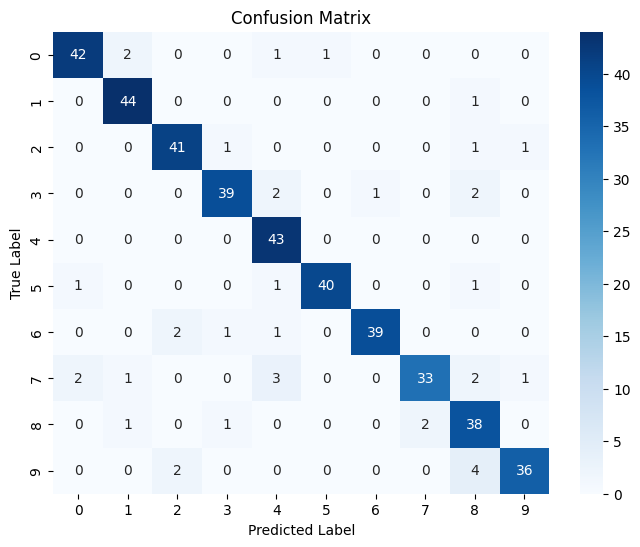

In [22]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Predicting new questions
In this cell, I used the trained model to predict the sentiment of new questions.

In [23]:
# Function to predict new questions
def predict_category(question):
    question_tfidf = tfidf_vectorizer.transform([question])
    predicted_label = model.predict(question_tfidf)[0]
    return predicted_label

# Example usage
sample_question = "I tried getting some cash at the ATM but it wouldn't give me any?"
print(f"Sample Prediction: {predict_category(sample_question)}")

Sample Prediction: 6


## Question 4:
My model show the high accuracy on the test data. The accuracy is 91% as you can see in the table above.
It means that my Logistic Regression model is strong for classifying 2169 questions across 10 labels.
However, some labels may be confused and I think it needs more samples.
My recommendation for this business is to monitor and retrain using misclassified cases to improve accuracy. I can explore advanced models like SVM and Neural Networks, if it needs more optimization.
Another recommendation is to balance labels via data augmentation or oversampling.

## Question 5:
My thought about potential areas for further improvment and enhancing the model:

-  Collect more data can increase the number of questions, especially for labels and it can help the model generalization.
- Use techninqies like paraphrasing and  synonym replacment to create more training examples.
- Another oppinion is using NLP techniques like n-grams, lemmatization or even word embedding to capture more context.
- Considering fine-tuning a model like BERT for richer contextual understanding.
- Comnbining multiple models like Logistic Regression, SVM and Naive Bayes to reduce errors.
- If the dataset expands, consider experimenting with neural networks that can capture more complex patterns.
By implementing these strategies, the model's performance can be improved and it remains robust and adoptable for future needs.
